In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "Data/Data_clean/Comments_clean.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,ID Post,User Name,Comments,Sentiments
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif
1,1,Jj Kie,عام انتم بخير,Positif
2,1,Sakou Younes,عام وانتم بخير,Positif
3,1,راني نعاني,عام وحنا بخير,Positif
4,1,أحمد فيراس,حب,Positif


In [2]:
from sklearn.preprocessing import LabelEncoder

# Supprimer les lignes avec commentaires manquants
df = df.dropna(subset=["Comments"])

# Encodage des étiquettes de sentiments
label_encoder = LabelEncoder()
df["Sentiments_encoded"] = label_encoder.fit_transform(df["Sentiments"])

# Séparer les données en variables d'entrée (X) et cible (y)
X = df["Comments"]
y = df["Sentiments_encoded"]

In [3]:
from sklearn.model_selection import train_test_split

# Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorisation
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Afficher les dimensions des matrices vectorisées
{
    "CountVectorizer train shape": X_train_count.shape,
    "CountVectorizer test shape": X_test_count.shape,
    "TF-IDF train shape": X_train_tfidf.shape,
    "TF-IDF test shape": X_test_tfidf.shape,
    "Classes": label_encoder.classes_
}

{'CountVectorizer train shape': (2892, 5033),
 'CountVectorizer test shape': (724, 5033),
 'TF-IDF train shape': (2892, 5033),
 'TF-IDF test shape': (724, 5033),
 'Classes': array(['Negatif', 'Neutre', 'Positif'], dtype=object)}

In [5]:
df.head()

,ID Post,User Name,Comments,Sentiments,Sentiments_encoded
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif,0
1,1,Jj Kie,عام انتم بخير,Positif,2
2,1,Sakou Younes,عام وانتم بخير,Positif,2
3,1,راني نعاني,عام وحنا بخير,Positif,2
4,1,أحمد فيراس,حب,Positif,2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec CountVectorizer:
Accuracy pour LogisticRegression avec CountVectorizer: 0.88
              precision    recall  f1-score   support

     Negatif       0.89      0.81      0.85       177
      Neutre       0.80      0.86      0.83       222
     Positif       0.93      0.92      0.92       325

    accuracy                           0.88       724
   macro avg       0.87      0.86      0.87       724
weighted avg       0.88      0.88      0.88       724



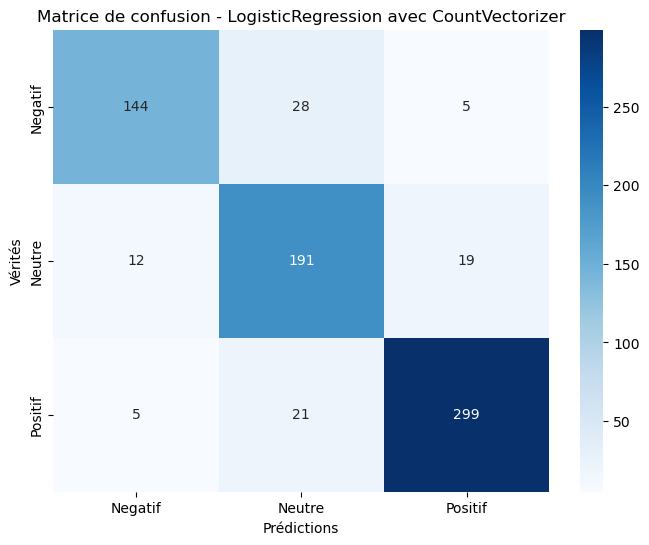

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec TF-IDF:
Accuracy pour LogisticRegression avec TF-IDF: 0.88
              precision    recall  f1-score   support

     Negatif       0.86      0.86      0.86       177
      Neutre       0.82      0.84      0.83       222
     Positif       0.93      0.91      0.92       325

    accuracy                           0.88       724
   macro avg       0.87      0.87      0.87       724
weighted avg       0.88      0.88      0.88       724



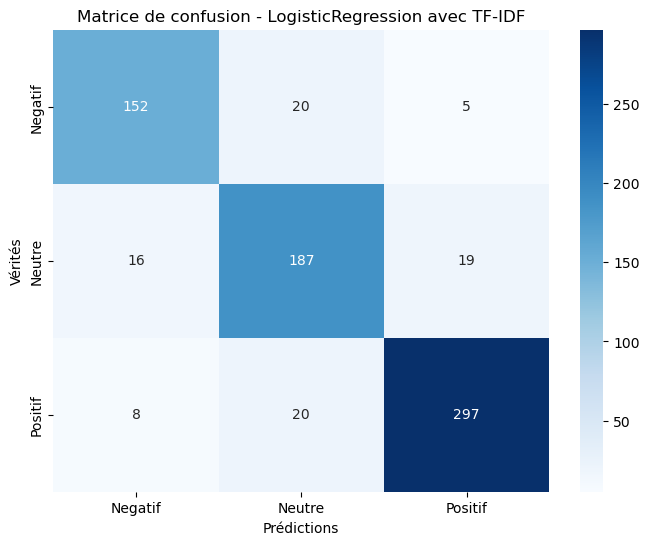

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entraînement et évaluation avec CountVectorizer
logistic_model_count = LogisticRegression(C=3, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_count.fit(X_train_count, y_train)
y_pred_count = logistic_model_count.predict(X_test_count)

# Rapport complet pour CountVectorizer
print("Rapport pour LogisticRegression avec CountVectorizer:")
# Accuracy pour CountVectorizer
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer: {accuracy_count:.2f}")
print(classification_report(y_test, y_pred_count, target_names=label_encoder.classes_))

# Matrice de confusion pour CountVectorizer
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
logistic_model_tfidf = LogisticRegression(C=10, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

# Rapport complet pour TF-IDF
print("Rapport pour LogisticRegression avec TF-IDF:")
# Accuracy pour TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF: {accuracy_tfidf:.2f}")
print(classification_report(y_test, y_pred_tfidf, target_names=label_encoder.classes_))

# Matrice de confusion pour TF-IDF
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour SVC avec CountVectorizer:
Accuracy pour SVC avec CountVectorizer: 0.86
              precision    recall  f1-score   support

     Negatif       0.87      0.81      0.84       177
      Neutre       0.78      0.84      0.81       222
     Positif       0.93      0.91      0.92       325

    accuracy                           0.86       724
   macro avg       0.86      0.85      0.85       724
weighted avg       0.87      0.86      0.86       724



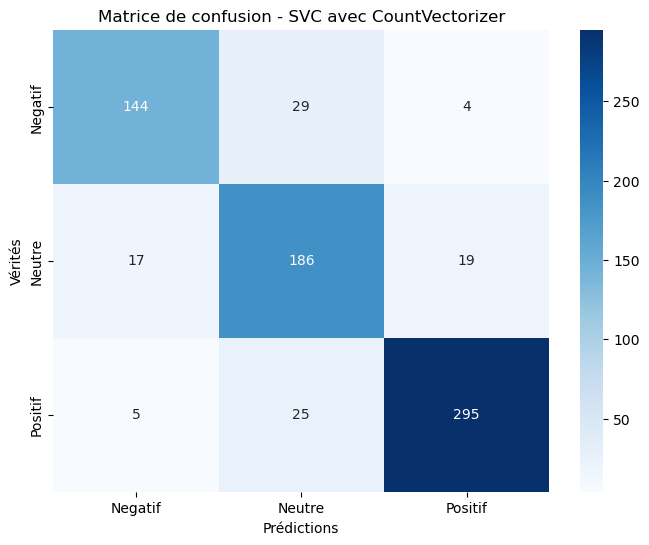

Rapport pour SVC avec TF-IDF:
Accuracy pour SVC avec TF-IDF: 0.88
              precision    recall  f1-score   support

     Negatif       0.86      0.87      0.87       177
      Neutre       0.80      0.83      0.82       222
     Positif       0.94      0.91      0.93       325

    accuracy                           0.88       724
   macro avg       0.87      0.87      0.87       724
weighted avg       0.88      0.88      0.88       724



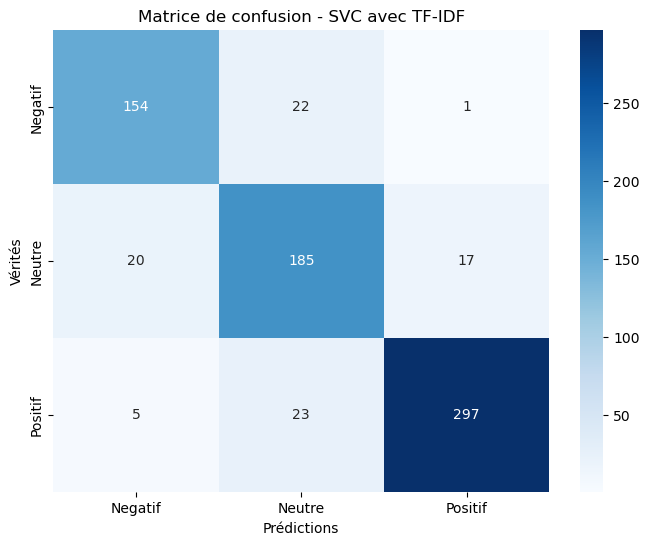

In [7]:
from sklearn.svm import SVC

# Entraînement et évaluation avec CountVectorizer
svc_model_count = SVC(C=3, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_count.fit(X_train_count, y_train)
y_pred_count_svc = svc_model_count.predict(X_test_count)

# Rapport complet pour SVC avec CountVectorizer
print("Rapport pour SVC avec CountVectorizer:")
# Accuracy pour CountVectorizer
accuracy_count_svc = accuracy_score(y_test, y_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer: {accuracy_count_svc:.2f}")
print(classification_report(y_test, y_pred_count_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec CountVectorizer
conf_matrix_count_svc = confusion_matrix(y_test, y_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
svc_model_tfidf = SVC(C=1, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_svc = svc_model_tfidf.predict(X_test_tfidf)

# Rapport complet pour SVC avec TF-IDF
print("Rapport pour SVC avec TF-IDF:")
# Accuracy pour TF-IDF
accuracy_tfidf_svc = accuracy_score(y_test, y_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF: {accuracy_tfidf_svc:.2f}")
print(classification_report(y_test, y_pred_tfidf_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec TF-IDF
conf_matrix_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour DecisionTreeClassifier avec CountVectorizer:
Accuracy pour DecisionTreeClassifier avec CountVectorizer: 0.82
              precision    recall  f1-score   support

     Negatif       0.83      0.74      0.78       177
      Neutre       0.69      0.86      0.76       222
     Positif       0.94      0.85      0.89       325

    accuracy                           0.82       724
   macro avg       0.82      0.81      0.81       724
weighted avg       0.84      0.82      0.83       724



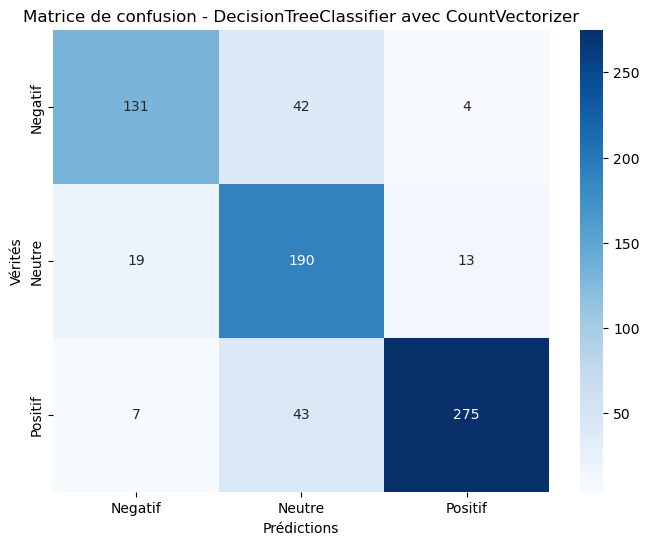

Rapport pour DecisionTreeClassifier avec TF-IDF:
Accuracy pour DecisionTreeClassifier avec TF-IDF: 0.82
              precision    recall  f1-score   support

     Negatif       0.83      0.79      0.81       177
      Neutre       0.72      0.79      0.76       222
     Positif       0.90      0.86      0.88       325

    accuracy                           0.82       724
   macro avg       0.82      0.81      0.81       724
weighted avg       0.83      0.82      0.82       724



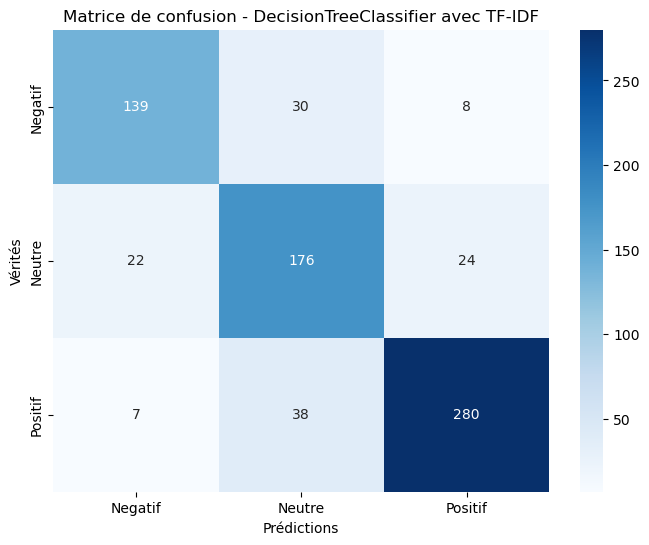

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entraînement et évaluation avec CountVectorizer
decision_tree_model_count = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_count.fit(X_train_count, y_train)
y_pred_count_dt = decision_tree_model_count.predict(X_test_count)

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer
print("Rapport pour DecisionTreeClassifier avec CountVectorizer:")
accuracy_count_dt = accuracy_score(y_test, y_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer: {accuracy_count_dt:.2f}")
print(classification_report(y_test, y_pred_count_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer
conf_matrix_count_dt = confusion_matrix(y_test, y_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
decision_tree_model_tfidf = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_test_tfidf)

# Rapport complet pour DecisionTreeClassifier avec TF-IDF
print("Rapport pour DecisionTreeClassifier avec TF-IDF:")
accuracy_tfidf_dt = accuracy_score(y_test, y_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF: {accuracy_tfidf_dt:.2f}")
print(classification_report(y_test, y_pred_tfidf_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF
conf_matrix_tfidf_dt = confusion_matrix(y_test, y_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour MultinomialNB avec CountVectorizer:
Accuracy pour MultinomialNB avec CountVectorizer: 0.88
              precision    recall  f1-score   support

     Negatif       0.86      0.87      0.86       177
      Neutre       0.83      0.78      0.81       222
     Positif       0.91      0.94      0.93       325

    accuracy                           0.88       724
   macro avg       0.87      0.87      0.87       724
weighted avg       0.87      0.88      0.87       724



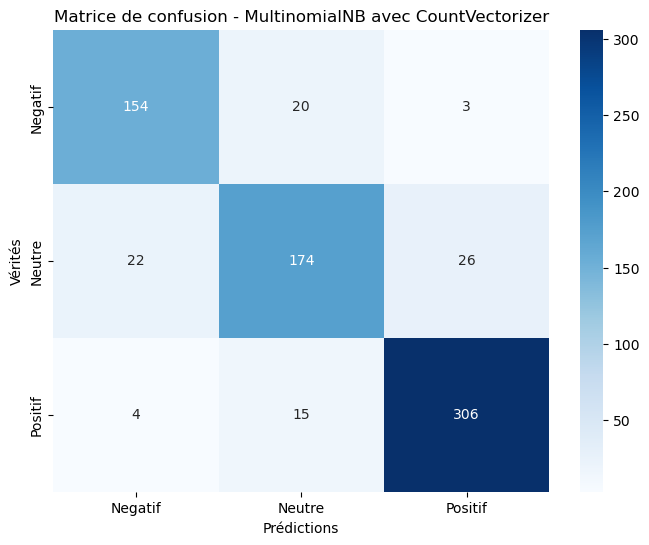

Rapport pour MultinomialNB avec TF-IDF:
Accuracy pour MultinomialNB avec TF-IDF: 0.88
              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.87       177
      Neutre       0.83      0.82      0.83       222
     Positif       0.91      0.94      0.92       325

    accuracy                           0.88       724
   macro avg       0.88      0.87      0.88       724
weighted avg       0.88      0.88      0.88       724



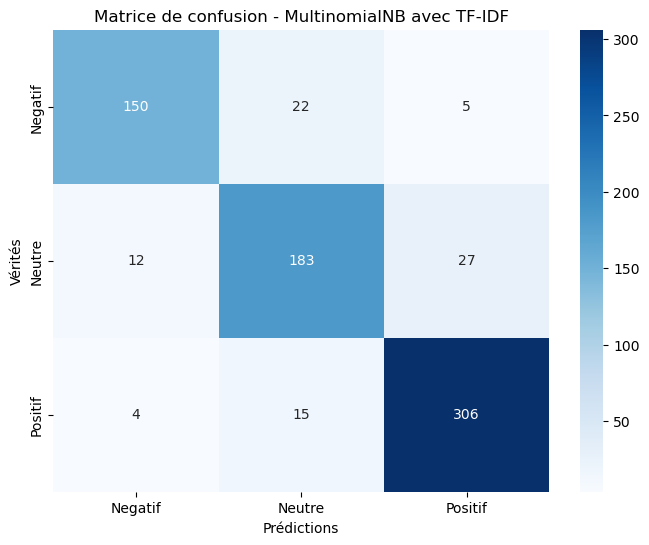

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Entraînement et évaluation avec CountVectorizer
nb_model_count = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_count.fit(X_train_count, y_train)
y_pred_count_nb = nb_model_count.predict(X_test_count)

# Rapport complet pour MultinomialNB avec CountVectorizer
print("Rapport pour MultinomialNB avec CountVectorizer:")
accuracy_count_nb = accuracy_score(y_test, y_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer: {accuracy_count_nb:.2f}")
print(classification_report(y_test, y_pred_count_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec CountVectorizer
conf_matrix_count_nb = confusion_matrix(y_test, y_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
nb_model_tfidf = MultinomialNB(alpha=1, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_nb = nb_model_tfidf.predict(X_test_tfidf)

# Rapport complet pour MultinomialNB avec TF-IDF
print("Rapport pour MultinomialNB avec TF-IDF:")
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF: {accuracy_tfidf_nb:.2f}")
print(classification_report(y_test, y_pred_tfidf_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec TF-IDF
conf_matrix_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 2892, number of used features: 500
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Rapport pour LGBMClassifier avec CountVectorizer:
Accuracy pour LGBMClassifier avec CountVectorizer: 0.86
              precision    recall  f1-score   support

     Negatif       0.86      0.81      0.83       177
      Neutre       0.76      0.86      0.81       222
     Positif       0.93      0.89      0.91       325

    accuracy                           0.86       724
   macro avg       0.85      0.85      0.85       724
weighted avg       0.86      0.86      0.86       724

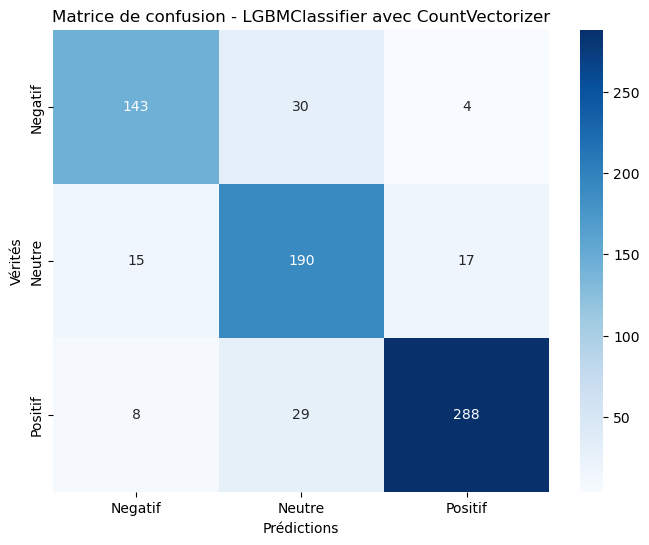

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 2892, number of used features: 500
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Rapport pour LGBMClassifier avec TF-IDF:
Accuracy pour LGBMClassifier avec TF-IDF: 0.84
              precision    recall  f1-score   support

     Negatif       0.88      0.79      0.83       177
      Neutre       0.72      0.85      0.78       222
     Positif       0.93      0.86      0.89       325

    accuracy                           0.84       724
   macro avg       0.84      0.83      0.83       724
weighted avg       0.85      0.84      0.84       724



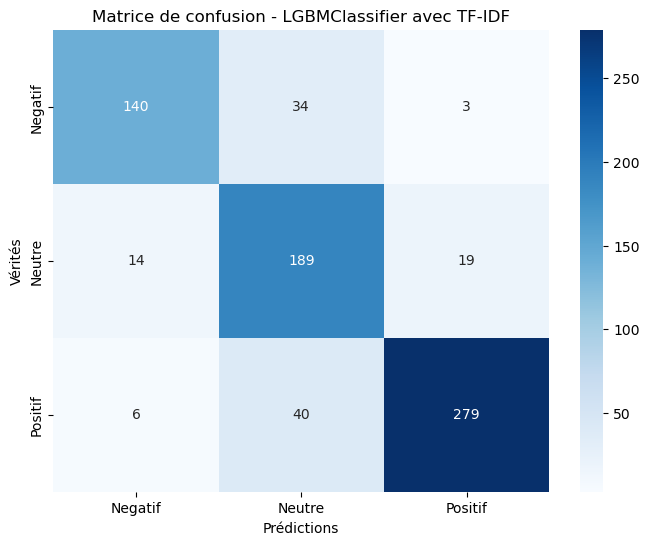

In [10]:
from lightgbm import LGBMClassifier
import numpy as np

# Entraînement et évaluation avec CountVectorizer
lgbm_model_count = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_count.fit(X_train_count.astype(np.float32), y_train)
y_pred_count_lgbm = lgbm_model_count.predict(X_test_count.astype(np.float32))

# Rapport complet pour LGBMClassifier avec CountVectorizer
print("Rapport pour LGBMClassifier avec CountVectorizer:")
accuracy_count_lgbm = accuracy_score(y_test, y_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer: {accuracy_count_lgbm:.2f}")
print(classification_report(y_test, y_pred_count_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec CountVectorizer
conf_matrix_count_lgbm = confusion_matrix(y_test, y_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
lgbm_model_tfidf = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_tfidf.fit(X_train_tfidf.astype(np.float32), y_train)
y_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_test_tfidf.astype(np.float32))

# Rapport complet pour LGBMClassifier avec TF-IDF
print("Rapport pour LGBMClassifier avec TF-IDF:")
accuracy_tfidf_lgbm = accuracy_score(y_test, y_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF: {accuracy_tfidf_lgbm:.2f}")
print(classification_report(y_test, y_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec TF-IDF
conf_matrix_tfidf_lgbm = confusion_matrix(y_test, y_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()